# Table of Contents
## Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.
## Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
## The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set
## The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.
## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents
###  Age
###  Income
###  n_dependants
###  Fam_Status and Crosstabs
###  Create Profiles from Crosstab Data
## Sales and Marketing Questions
###  The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders
###  They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times
###  Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.
###  Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.
###  The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example
####     What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
####     Are there differences in ordering habits based on a customer’s loyalty status?
####     Are there differences in ordering habits based on a customer’s region?
####     Is there a connection between age and family status in terms of ordering habits?
####     What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?
####     What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.
## Export Data

In [ ]:
# Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plp

In [2]:
# create path
path = r'C:\Users\eserc\Documents\Sharon Data Stuffffff sry'

In [3]:
# import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_large_4_10.pkl'))

In [4]:
# check output size
df.shape

(28662555, 27)

In [5]:
# create a random sampling assigning each value true or false
np.random.seed(5)
dev = np.random.rand(len(df)) <= 0.9

In [6]:
# store 90% of the dtata in the label 'big' and 10% in the label 'small'
big = df[dev]
small = df[~dev]

In [7]:
# create small df for test to preserve RAM
df2 = small

In [8]:
# get a list of columns and data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2866961 entries, 4 to 32641200
Data columns (total 27 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                float16
 1   user_id                 object 
 2   order_number            int8   
 3   order_day_of_week       int8   
 4   order_hour_of_day       int8   
 5   days_since_prior_order  float16
 6   product_id              float16
 7   reordered               float16
 8   product_name            object 
 9   department_id           int8   
 10  prices                  float16
 11  price_range_loc         object 
 12  busiest_days            object 
 13  busiest_period_of_day   object 
 14  max_order               float16
 15  loyalty_flag            object 
 16  average_order           float16
 17  spender                 object 
 18  first_name              object 
 19  last_name               object 
 20  gender                  object 
 21  state                   object

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [9]:
# to hid PII we will drop names from this analysis
df3 = df2.drop(['first_name','last_name'], axis=1)

In [10]:
# check to see if PII columns are dropped
df3.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'reordered', 'product_name', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_order', 'spender', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
# create flags for different regions based on the state
df3.loc[df3['state'] == 'Maine', 'region'] = 'Region 1'

In [12]:
df3.loc[df3['state'] == 'Connecticut', 'region'] = 'Region 1'

In [13]:
df3.loc[df3['state'] == 'Vermont', 'region'] = 'Region 1'

In [14]:
df3.loc[df3['state'] == 'Massachusetts', 'region'] = 'Region 1'

In [15]:
df3.loc[df3['state'] == 'Rhode Island', 'region'] = 'Region 1'

In [16]:
df3.loc[df3['state'] == 'New Hampshire', 'region'] = 'Region 1'

In [17]:
df3.loc[df3['state'] == 'New York', 'region'] = 'Region 1'

In [18]:
df3.loc[df3['state'] == 'New Jersey', 'region'] = 'Region 1'

In [19]:
df3.loc[df3['state'] == 'Pennsylvania', 'region'] = 'Region 1'

In [20]:
df3.loc[df3['state'] == 'Wisconsin', 'region'] = 'Region 2'

In [21]:
df3.loc[df3['state'] == 'Michigan', 'region'] = 'Region 2'

In [22]:
df3.loc[df3['state'] == 'Illinois', 'region'] = 'Region 2'

In [23]:
df3.loc[df3['state'] == 'Indiana', 'region'] = 'Region 2'

In [24]:
df3.loc[df3['state'] == 'Ohio', 'region'] = 'Region 2'

In [25]:
df3.loc[df3['state'] == 'South Dakota', 'region'] = 'Region 2'

In [26]:
df3.loc[df3['state'] == 'North Dakota', 'region'] = 'Region 2'

In [27]:
df3.loc[df3['state'] == 'Nebraska', 'region'] = 'Region 2'

In [28]:
df3.loc[df3['state'] == 'Kansas', 'region'] = 'Region 2'

In [29]:
df3.loc[df3['state'] == 'Minnesota', 'region'] = 'Region 2'

In [30]:
df3.loc[df3['state'] == 'Iowa', 'region'] = 'Region 2'

In [31]:
df3.loc[df3['state'] == 'Missouri', 'region'] = 'Region 2'

In [32]:
df3.loc[df3['state'] == 'Delaware', 'region'] = 'Region 3'

In [33]:
df3.loc[df3['state'] == 'Maryland', 'region'] = 'Region 3'

In [34]:
df3.loc[df3['state'] == 'District of Columbia', 'region'] = 'Region 3'

In [35]:
df3.loc[df3['state'] == 'Virginia', 'region'] = 'Region 3'

In [36]:
df3.loc[df3['state'] == 'West Virginia', 'region'] = 'Region 3'

In [37]:
df3.loc[df3['state'] == 'North Carolina', 'region'] = 'Region 3'

In [38]:
df3.loc[df3['state'] == 'South Carolina', 'region'] = 'Region 3'

In [39]:
df3.loc[df3['state'] == 'Georgia', 'region'] = 'Region 3'

In [40]:
df3.loc[df3['state'] == 'Florida', 'region'] = 'Region 3'

In [41]:
df3.loc[df3['state'] == 'Tennessee', 'region'] = 'Region 3'

In [42]:
df3.loc[df3['state'] == 'Kentucky', 'region'] = 'Region 3'

In [43]:
df3.loc[df3['state'] == 'Mississippi', 'region'] = 'Region 3'

In [44]:
df3.loc[df3['state'] == 'Alabama', 'region'] = 'Region 3'

In [45]:
df3.loc[df3['state'] == 'Texas', 'region'] = 'Region 3'

In [46]:
df3.loc[df3['state'] == 'Oklahoma', 'region'] = 'Region 3'

In [47]:
df3.loc[df3['state'] == 'Arkansas', 'region'] = 'Region 3'

In [48]:
df3.loc[df3['state'] == 'Louisiana', 'region'] = 'Region 3'

In [49]:
df3.loc[df3['state'] == 'Idaho', 'region'] = 'Region 4'

In [50]:
df3.loc[df3['state'] == 'California', 'region'] = 'Region 4'

In [51]:
df3.loc[df3['state'] == 'Utah', 'region'] = 'Region 4'

In [52]:
df3.loc[df3['state'] == 'Arizona', 'region'] = 'Region 4'

In [53]:
df3.loc[df3['state'] == 'Montana', 'region'] = 'Region 4'

In [54]:
df3.loc[df3['state'] == 'New Mexico', 'region'] = 'Region 4'

In [55]:
df3.loc[df3['state'] == 'Nevada', 'region'] = 'Region 4'

In [56]:
df3.loc[df3['state'] == 'Colorado', 'region'] = 'Region 4'

In [57]:
df3.loc[df3['state'] == 'Alaska', 'region'] = 'Region 4'

In [58]:
df3.loc[df3['state'] == 'Washington', 'region'] = 'Region 4'

In [59]:
df3.loc[df3['state'] == 'Oregon', 'region'] = 'Region 4'

In [60]:
df3.loc[df3['state'] == 'Hawaii', 'region'] = 'Region 4'

In [61]:
df3.loc[df3['state'] == 'Wyoming', 'region'] = 'Region 4'

In [62]:
# check output
df3['region'].value_counts(dropna = False)

Region 3    953794
Region 4    732599
Region 2    672934
Region 1    507634
Name: region, dtype: int64

In [63]:
# find highest spending region
crosstab = pd.crosstab(df3['region'], df3['spender'], dropna = False)

In [64]:
# copy to clipboard for excel analysis
crosstab.to_clipboard()

In [65]:
crosstab.head()

spender,High Spender,Low Spender
region,,
Region 1,9457,498177
Region 2,14069,658865
Region 3,18240,935554
Region 4,13903,718696


In terms of overall highest spenders, region two has the highest percentage of high spenders. Here's the breakdown of regions and percent of customers that are high spenders. They are all relatively close falling within 1.8 to 2 percent.

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [66]:
# create exclusion flag

def exclusion_flag(row):
    
    if row['order_number'] <5:
        return 'No'
    elif row['order_number'] >4:
        return 'Yes'
    else: return 'Not enough data'

In [67]:
# apply filter

df3['exclusion'] = df3.apply(exclusion_flag, axis=1)

In [68]:
# check filter
df3['exclusion'].value_counts(dropna = False)

Yes    2308148
No      558813
Name: exclusion, dtype: int64

In [69]:
# create data frame of subset with only exclusions = Yes
df4 =  df3[df3['exclusion']=='Yes']

In [ ]:
# export data set
df4.to_pickle(os.path.join('02 Data', 'Prepared Data', 'data_combined_large_4_10_1.pkl'))

In [70]:
# check output
df4.shape

(2308148, 27)

In [71]:
# drop exclusion column
df4.drop('exclusion',axis = 1, inplace = True)

C:\Users\eserc\AppData\Local\Temp\ipykernel_2852\819257071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('exclusion',axis = 1, inplace = True)


In [72]:
# check to see if column was dropped
df4.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'reordered', 'product_name', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_order', 'spender', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'region'],
      dtype='object')

In [73]:
df.shape

(28662555, 27)

# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

# Age

In [314]:
# get descriptive statistics on ages in our customer base
df4['age'].describe()

count    2.308148e+06
mean     4.948535e+01
std      1.848344e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.600000e+01
max      8.100000e+01
Name: age, dtype: float64

The average age is 49 years old and ranges from 18-81 years old. 

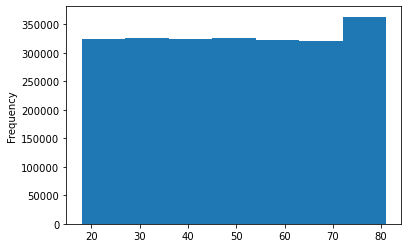

In [315]:
# Get demographics on age 
age_hist = df4['age'].plot.hist(bins = 7)

The 70+ year old crowd has purchased the most items

In [316]:
# save histogram
age_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_age.png'))

In [317]:
# create ranges for age brackets
def age_bracket(row):

  if row['age'] <=30:
    return '18-30'
  elif (row['age'] >= 31) and (row['age'] <= 40):
    return '31-40'
  elif (row['age'] >= 41) and (row['age'] <= 50):
    return '41-50'
  elif (row['age'] >= 51) and (row['age'] <= 60):
    return '51-60'
  elif (row['age'] >= 61) and (row['age'] <= 70):
    return '61-70'
  elif row['age'] >= 71:
    return '71-81'
  else: return 'Not enough data'

In [318]:
# apply filter

df4['age_range'] = df4.apply(age_bracket, axis=1)

C:\Users\eserc\AppData\Local\Temp\ipykernel_8532\2203663988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age_range'] = df4.apply(age_bracket, axis=1)


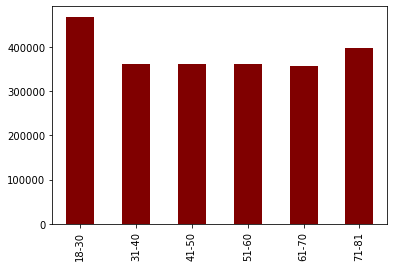

In [319]:
# create bar for age range brackets
bar_age = df4['age_range'].value_counts().sort_index().plot.bar(color = ['maroon'])

In [320]:
crosstab_age = pd.crosstab(df4['age_range'], df4['spender'], dropna = False)

In [321]:
crosstab_age.head(7)

spender,High Spender,Low Spender
age_range,,
18-30,8438,460454
31-40,6863,355146
41-50,8099,353588
51-60,6826,353706
61-70,7410,349656
71-81,7436,390526


In terms of high spenders, the ratios all range between 1.8-2.2%. The highest spending age bracket is 41-50.

In [322]:
# take crosstab to clipboard for excel analysis
crosstab_age.to_clipboard()

In [323]:
df4.groupby('age_range').agg({'income': ['mean']})

,income
,mean
age_range,
18-30,70766.735713
31-40,70708.129008
41-50,117157.140577
51-60,115542.782566
61-70,116193.827780
71-81,116342.992386


The highest income bracket is also the highest spending group (41-50 year olds). It is interesting to note though that even though 18-40 year olds make significantly less money, they are still very close when it comes to high spender ratios.

In [324]:
df4.groupby('age_range').agg({'order_hour_of_day': ['mean']})

,order_hour_of_day
,mean
age_range,
18-30,13.336167
31-40,13.349790
41-50,13.408007
51-60,13.367130
61-70,13.369932
71-81,13.378395


The average hour of the day is very similar among all age brackets, all falling within the same .1 hours.

In [325]:
df4.groupby('age_range').agg({'prices': ['mean']})

,prices
,mean
age_range,
18-30,7.781250
31-40,7.792969
41-50,7.800781
51-60,7.769531
61-70,7.800781
71-81,7.804688


The average price per item is very similar among all age brackets, all falling within a 4 cent range.

In [326]:
df4.groupby('age_range').agg({'max_order': ['mean']})

,max_order
,mean
age_range,
18-30,39.12500
31-40,39.90625
41-50,39.34375
51-60,39.43750
61-70,39.46875
71-81,39.40625


The average max order is very similar across age groups.

In [327]:
crosstab_age_reg = pd.crosstab(df4['age_range'], df4['region'], dropna = False)

In [328]:
crosstab_age_reg.head()

region,Region 1,Region 2,Region 3,Region 4
age_range,,,,
18-30,83765,108395,157491,119241
31-40,62529,83858,124014,91608
41-50,62503,88054,118573,92557
51-60,64099,85345,116840,94248
61-70,64235,83693,118425,90713


The regions seem to follow a pretty even spread as well. The most popular region in each group is region 3.

# income

In [329]:
# get descriptive statistics on income in our customer base
df4['income'].describe()

count    2.308148e+06
mean     9.990649e+04
std      4.325826e+04
min      2.590300e+04
25%      6.754600e+04
50%      9.682500e+04
75%      1.282230e+05
max      5.939010e+05
Name: income, dtype: float64

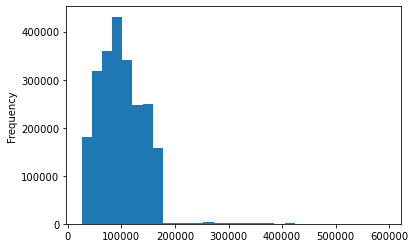

In [330]:
# Get spread of income 
income_hist = df4['income'].plot.hist(bins = 30)

A small portion of our customers make over 200,000. The majority fall within 40,000-180,000 approximately.

In [331]:
# save histogram
income_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income.png'))

In [332]:
# create ranges for age brackets
def income_bracket(row):

  if (row['income'] >= 25903) and (row['income'] <= 67546):
    return 'low_income'
  elif (row['income'] >= 67547) and (row['income'] <= 96825):
    return 'low_mid_income'
  elif(row['income'] >= 96826) and (row['income'] <= 128223):
    return 'high_mid_income'
  elif (row['income'] >= 128224):
    return 'high_income'
  else: return 'Not enough data'

In [333]:
# apply filter

df4['income_bracket'] = df4.apply(income_bracket, axis=1)

C:\Users\eserc\AppData\Local\Temp\ipykernel_8532\3712931610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['income_bracket'] = df4.apply(income_bracket, axis=1)


In [334]:
# check filter
df4['income_bracket'].value_counts()

low_income         577099
high_mid_income    577039
high_income        577025
low_mid_income     576985
Name: income_bracket, dtype: int64

In [335]:
# check for high spenders 
crosstab_income = pd.crosstab(df4['income_bracket'], df4['spender'], dropna = False)

In [336]:
crosstab_income.head()

spender,High Spender,Low Spender
income_bracket,,
high_income,34427,542598
high_mid_income,5943,571096
low_income,1386,575713
low_mid_income,3316,573669


Unsurprisingly, our high income bracket has a much higher ratio of high spenders. Followed by high_mid_income, low_mid_income and low_income.

In [337]:
crosstab_income_region = pd.crosstab(df4['income_bracket'], df4['region'], dropna = False)

In [338]:
crosstab_income_region.head()

region,Region 1,Region 2,Region 3,Region 4
income_bracket,,,,
high_income,102619,137770,189088,147548
high_mid_income,102494,137900,188474,148171
low_income,102126,133512,193545,147916
low_mid_income,102302,131163,196895,146625


The regions have a very similar income spread.

In [339]:
df4.groupby('age_range').agg({'max_order': ['mean']})

,max_order
,mean
age_range,
18-30,39.12500
31-40,39.90625
41-50,39.34375
51-60,39.43750
61-70,39.46875
71-81,39.40625


Among the different income brackets, max order does not change dramatically.

In [340]:
df4.groupby('income_bracket').agg({'prices': ['mean']})

,prices
,mean
income_bracket,
high_income,7.945312
high_mid_income,7.953125
low_income,7.320312
low_mid_income,7.945312


We see slight changes in the average price of an item in the income brackets.

In [341]:
df4.groupby('income_bracket').agg({'order_hour_of_day': ['mean']})

,order_hour_of_day
,mean
income_bracket,
high_income,13.414129
high_mid_income,13.405174
low_income,13.258488
low_mid_income,13.389830


All of the income brackets order at similar times of day, with the low_income ordering the soonest.

# n_dependants

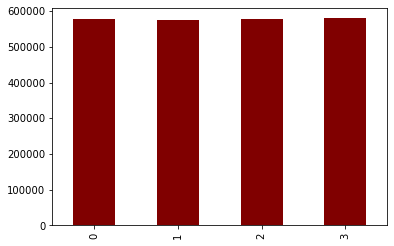

In [342]:
# Get spread of income
dependants_bar = df4['n_dependants'].value_counts().sort_index().plot.bar(color = ['maroon'])

The n_dependants is very similar

In [343]:
crosstab_fam_dependants = pd.crosstab(df4['n_dependants'], df4['fam_status'], dropna = False)

In [344]:
crosstab_fam_dependants.head()

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0,198652,0,0,377914
1,0,38895,536229,0
2,0,35852,540859,0
3,0,36071,543676,0


This is very odd. According to our data, divorced/widowed and single people all have zero dependants. While thise with 1,2, or 3 kids are all married or living with parents and siblings.

In [345]:
crosstab_fam_dependants_full = pd.crosstab(df['n_dependants'], df['fam_status'], dropna = False)

In [346]:
crosstab_fam_dependants_full

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0,2461606,0,0,4697362
1,0,476933,6673785,0
2,0,448599,6716293,0
3,0,451593,6736384,0


Even on the full data set this is true. How interesting.

# Fam_Status and Crosstabs

In [347]:
df5 = df4[df4['fam_status'] == 'divorced/widowed']

In [348]:
crosstab_divorced_age = pd.crosstab(df5['fam_status'], df5['age_range'], dropna = False)

In [349]:
crosstab_divorced_age.head()

age_range,51-60,61-70,71-81
fam_status,,,
divorced/widowed,8175,90668,99809


In [350]:
crosstab_age_fam_status = pd.crosstab(df4['fam_status'], df4['age_range'], dropna = False)

In [351]:
crosstab_age_fam_status.head()

age_range,18-30,31-40,41-50,51-60,61-70,71-81
fam_status,,,,,,
divorced/widowed,0,0,0,8175,90668,99809
living with parents and siblings,110818,0,0,0,0,0
married,242649,271656,273049,268859,266398,298153
single,115425,90353,88638,83498,0,0


In [352]:
crosstab_age_parent = pd.crosstab(df4['n_dependants'], df4['age_range'], dropna = False)

In [353]:
crosstab_age_parent.head()

age_range,18-30,31-40,41-50,51-60,61-70,71-81
n_dependants,,,,,,
0,115425,90353,88638,91673,90668,99809
1,118027,90176,92864,90546,85517,97994
2,116085,92157,89378,85889,91848,101354
3,119355,89323,90807,92424,89033,98805


# Create Profiles from Crosstab Data

In [354]:
# create profiles on key variables

# create ranges for age brackets
def age_fam_dependants(row):

  if (row['fam_status'] == 'single') and (row['age_range'] == '18-30'):
    return 'Young Single'
  elif (row['fam_status'] == 'divorced/widowed') and (row['age'] >60):
    return 'Older Divorced'
  elif(row['fam_status'] == 'married') and (row['age'] >40) and (row['age'] <61) and (row['n_dependants'] >0):
    return 'Middle Age Married Parent'
  elif(row['fam_status'] == 'married') and (row['age_range'] == '18-30') and (row['n_dependants'] >0):
    return 'Young Married Parent'
  elif(row['fam_status'] == 'living with parents and siblings') and (row['age_range'] == '18-30'):
    return 'Young Single At Home'
  else: return 'Not enough data'

In [355]:
# apply filter

df4['age_fam_dep'] = df4.apply(age_fam_dependants, axis=1)

C:\Users\eserc\AppData\Local\Temp\ipykernel_8532\722366474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['age_fam_dep'] = df4.apply(age_fam_dependants, axis=1)


In [367]:
df4['age_fam_dep'].value_counts()

Not enough data              1106871
Middle Age Married Parent     541908
Young Married Parent          242649
Older Divorced                190477
Young Single                  115425
Young Single At Home          110818
Name: age_fam_dep, dtype: int64

# 6. Marketing and Sales Questions

# 1. The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

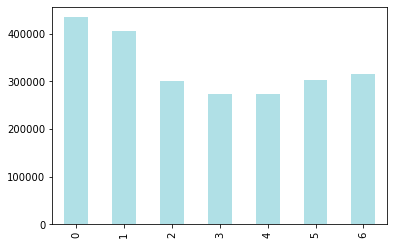

In [89]:
bar_dow = df4['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['powderblue'])

In [75]:
df4.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'reordered', 'product_name', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_order', 'spender', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'region'],
      dtype='object')

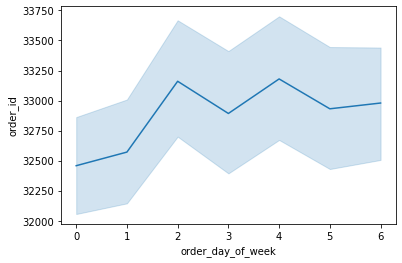

In [88]:
# create lineplot for orders day of the week
line_days = sns.lineplot(data = df4, x = 'order_day_of_week',y = 'order_id')

In [79]:
# save line chart
line_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dow.png'))

In [90]:
# save bar chart
bar_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dow.png'))

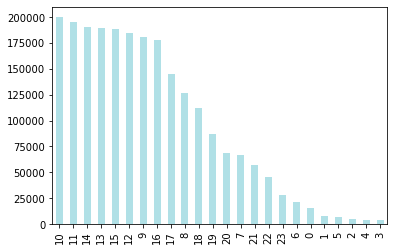

In [422]:
bar_hour_day = df4['order_hour_of_day'].value_counts().plot.bar(color = ['powderblue'])

In [423]:
# save bar chart
bar_hour_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hour_day.png'))

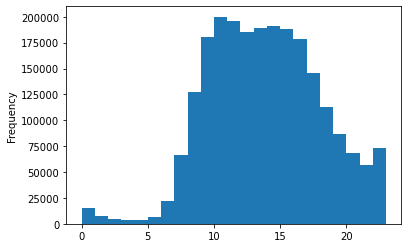

In [84]:
# create histogram for hours of the day
hist_order_hod = df4['order_hour_of_day'].plot.hist(bins = 23)

In [85]:
hist_order_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hod'))

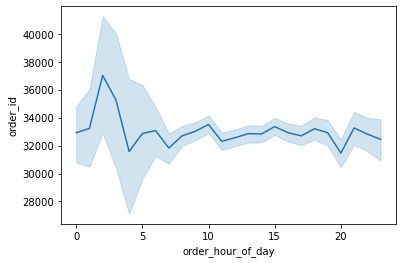

In [86]:
# create lineplot for orders hour of the day
line_days = sns.lineplot(data = df4, x = 'order_hour_of_day',y = 'order_id')

In [252]:
crosstab_day_time = pd.crosstab(df4['order_hour_of_day'], df4['order_day_of_week'], dropna = False)

In [254]:
crosstab_day_time.head(23)

order_day_of_week,0,1,2,3,4,5,6
order_hour_of_day,,,,,,,
0,2816,2572,2029,1961,1725,2040,2096
1,1430,1334,963,881,918,1101,1278
2,890,723,553,574,550,657,772
3,600,524,502,375,428,549,467
4,564,570,452,451,462,616,557
5,825,1070,933,844,814,1178,763
6,2437,4085,3291,3007,2953,3484,2294
7,9923,12401,9084,8299,8436,9574,8772
8,22461,25017,16572,14404,14297,16567,17679


The busiest to least busy days are as follows: Saturday, Sunday, Friday, Thursday, Monday, Wednesday, Tuesday.
9am to 4am is the busiest time of day, 10pm to 6am is the slowest, and the hours between those are moderate.
Our absolute slowest period is 3am on Tuesday.

# 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [100]:
df5 = df4[df4['spender']=='High Spender']

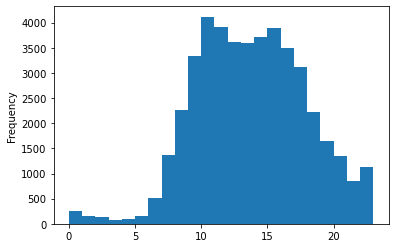

In [101]:
spender_times = df5['order_hour_of_day'].plot.hist(bins = 23)

In [102]:
spender_times.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices'))

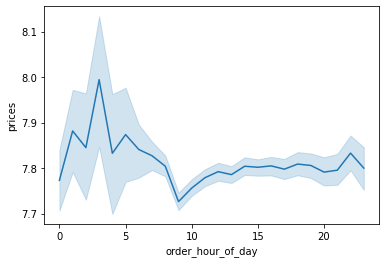

In [93]:
# create lineplot for orders hour of the day and prices
line_prices = sns.lineplot(data = df4, x = 'order_hour_of_day',y = 'prices')

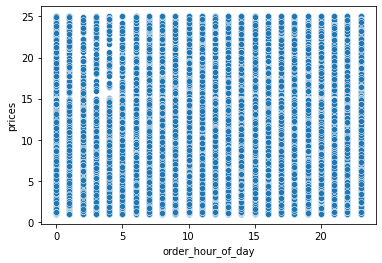

In [97]:
scatter_price_hour = sns.scatterplot(x = 'order_hour_of_day', y = 'prices',data = df4)

In [103]:
# save line plot
line_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices'))

In [424]:
# save histogram
spender_times.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spender_times.png'))

In [141]:
df6 = df4[df4['price_range_loc']=='High-range product']

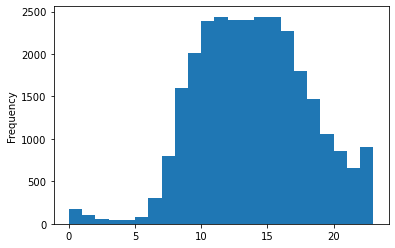

In [143]:
high_range_times = df6['order_hour_of_day'].plot.hist(bins = 23)

In [425]:
# save histogram
high_range_times.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'high_times.png'))

# 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [120]:
df4['price_range_loc'].value_counts()

Mid=range product     1558386
Low-range product      721005
High-range product      28757
Name: price_range_loc, dtype: int64

# 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [105]:
# create filter to assign department names to department_id

def department_names(row):

  if row['department_id'] == 1:
    return 'Frozen'
  elif row['department_id'] == 2:
    return 'Other'
  elif row['department_id'] == 3:
    return 'Bakery'
  elif row['department_id'] == 4:
    return 'Produce'
  elif row['department_id'] == 5:
    return 'Alcohol'
  elif row['department_id'] == 6:
    return 'International'
  elif row['department_id'] == 7:
    return 'Beverages'
  elif row['department_id'] == 8:
    return 'Pets'
  elif row['department_id'] == 9:
    return 'Dry goods Pasta'
  elif row['department_id'] == 10:
    return 'Bulk'
  elif row['department_id'] == 11:
    return 'Personal care'
  elif row['department_id'] == 12:
    return 'Meat Seafood'
  elif row['department_id'] == 13:
    return 'Pantry'
  elif row['department_id'] == 14:
    return 'Breakfast'
  elif row['department_id'] == 15:
    return 'Canned goods'
  elif row['department_id'] == 16:
    return 'Dairy'
  elif row['department_id'] == 17:
    return 'Household'
  elif row['department_id'] == 18:
    return 'Babies'
  elif row['department_id'] == 19:
    return 'Snacks'
  elif row['department_id'] == 20:
    return 'Deli'
  elif row['department_id'] == 21:
    return 'Missing'
  else: return 'Not enough data'

In [106]:
# apply filter

df4['department'] = df4.apply(department_names, axis=1)

C:\Users\eserc\AppData\Local\Temp\ipykernel_2852\10709665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['department'] = df4.apply(department_names, axis=1)


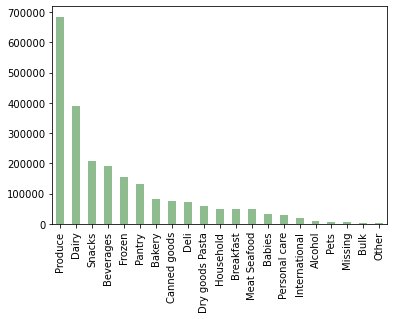

In [107]:
bar_departments = df4['department'].value_counts().plot.bar(color =['darkseagreen'])

In [108]:
# save bar depatments
bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'departments.png'))

The most popular department is produce followed by dairy and snacks. The least popular categories are bulk, pets, and alcohol.

# 5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

# A.What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

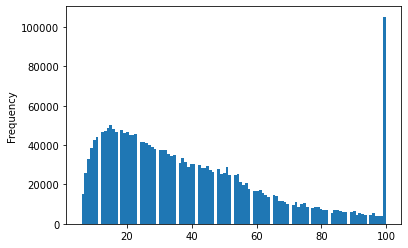

In [153]:
# create histogram for returning customers
returning_customers = df4['max_order'].plot.hist(bins = 110)

In [427]:
# save histogram
returning_customers.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'returns.png'))

Our max_orders for users peak around 10-15 and very gradually decline. However, there is a very strange phenomenon where we have an extremely high number of "max_orders" right around a hundred. This leads me to believe that there is an issue with our data.

# B.Are there differences in ordering habits based on a customer’s loyalty status?

In [110]:
# create subset for loyal customers
df_loyal = df4[df4['loyalty_flag']== 'Loyal customer']

In [111]:
# get distribution of loyalty
df4['loyalty_flag'].value_counts() 2308148

Regular customer    1220563
Loyal customer       932014
New customer         155571
Name: loyalty_flag, dtype: int64

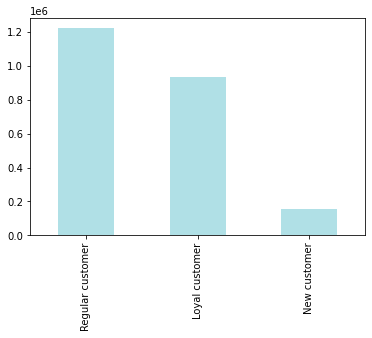

In [112]:
# bar chart for loyalty
loyal_bar = df4['loyalty_flag'].value_counts().plot.bar(color = ['powderblue'])

In [113]:
# save bar
loyal_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_bar.png'))

In [114]:
# get info on loyal customers
df_loyal.describe()

C:\Users\eserc\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,department_id,prices,max_order,average_order,age,n_dependants,income
count,932014.0,932014.000000,932014.000000,932014.000000,932014.0,932014.0,932014.0,932014.00000,932014.000000,932014.0,932014.000000,932014.000000,932014.000000,932014.000000
mean,NaN,34.493018,2.787496,13.194589,NaN,NaN,NaN,9.95768,NaN,NaN,NaN,49.580064,1.499085,100285.996378
std,NaN,20.616496,2.045207,4.261820,0.0,NaN,0.0,6.28297,0.000000,0.0,NaN,18.450155,1.120284,43659.215498
min,4.0,5.000000,0.000000,0.000000,0.0,1.0,0.0,1.00000,1.000000,41.0,2.386719,18.000000,0.000000,25955.000000
25%,NaN,18.000000,1.000000,10.000000,3.0,13576.0,1.0,4.00000,4.199219,49.0,7.414062,34.000000,0.000000,67951.000000
50%,NaN,32.000000,3.000000,13.000000,5.0,25152.0,1.0,8.00000,7.398438,59.0,7.816406,50.000000,1.000000,96853.000000
75%,NaN,46.000000,5.000000,16.000000,7.0,37824.0,1.0,16.00000,11.203125,78.0,8.210938,66.000000,3.000000,127916.000000
max,inf,99.000000,6.000000,23.000000,30.0,49696.0,1.0,21.00000,25.000000,100.0,8792.000000,81.000000,3.000000,593901.000000


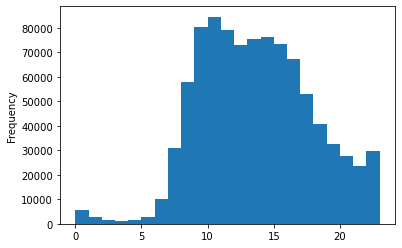

In [115]:
# loyal customer time of day
loyal_customer_times = df_loyal['order_hour_of_day'].plot.hist(bins = 23)

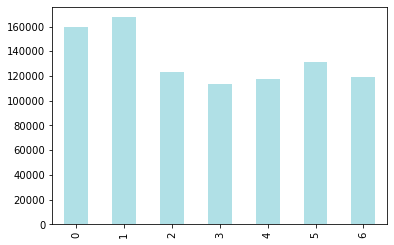

In [120]:
# loyal customer day of week
loyal_customer_days = df_loyal['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['powderblue'])

In [121]:
# save histogram
loyal_customer_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_customer_days.png'))

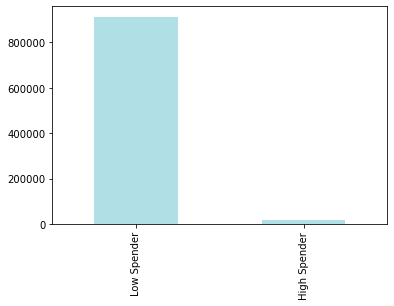

In [176]:
# loyal customer spender
loyal_spender_bar = df_loyal['spender'].value_counts().plot.bar(color = ['powderblue'])

In [177]:
# create df for regular customer
df_regular = df4[df4['loyalty_flag']== 'Regular customer']

In [179]:
# get info on regular customers
df_regular.describe()

,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,max_order,average_order,age,n_dependants,income
count,1.220563e+06,1.220563e+06,1.220563e+06,1220563.0,1.220563e+06,1.220563e+06,1.220563e+06,1.220563e+06,1.220563e+06,1.220563e+06,1.220563e+06
mean,1.430699e+01,2.722224e+00,1.346557e+01,NaN,9.902565e+00,NaN,2.425153e+01,NaN,4.940911e+01,1.505921e+00,9.995078e+04
std,7.500883e+00,2.107448e+00,4.238409e+00,0.0,6.286188e+00,0.000000e+00,8.445893e+00,NaN,1.849700e+01,1.117941e+00,4.320261e+04
min,5.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,1.100000e+01,1.695312e+00,1.800000e+01,0.000000e+00,2.597200e+04
25%,8.000000e+00,1.000000e+00,1.000000e+01,6.0,4.000000e+00,4.199219e+00,1.700000e+01,7.398438e+00,3.300000e+01,1.000000e+00,6.758100e+04
50%,1.200000e+01,2.000000e+00,1.300000e+01,9.0,9.000000e+00,7.398438e+00,2.400000e+01,7.832031e+00,4.900000e+01,2.000000e+00,9.696800e+04
75%,1.900000e+01,5.000000e+00,1.600000e+01,16.0,1.600000e+01,1.129688e+01,3.100000e+01,8.257812e+00,6.500000e+01,3.000000e+00,1.285530e+05
max,3.900000e+01,6.000000e+00,2.300000e+01,30.0,2.100000e+01,2.500000e+01,4.000000e+01,1.500800e+04,8.100000e+01,3.000000e+00,5.910890e+05


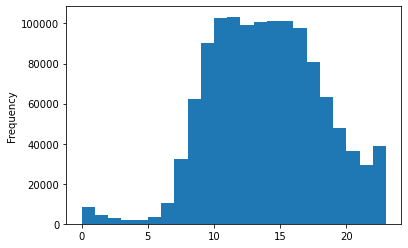

In [180]:
# regular customer hour of day
regular_customer_times = df_regular['order_hour_of_day'].plot.hist(bins = 23)

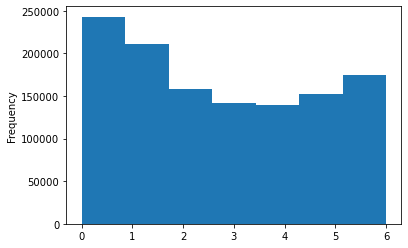

In [182]:
# regular customer day of week
regular_customer_days = df_regular['order_day_of_week'].plot.hist(bins = 7)

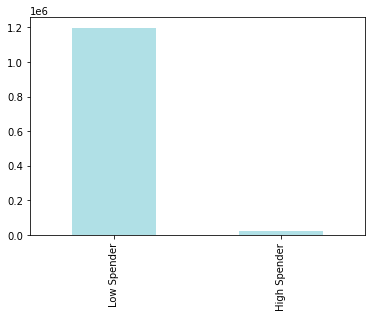

In [183]:
# regular customer spender
regular_spender_bar = df_regular['spender'].value_counts().plot.bar(color = ['powderblue'])

In [184]:
# create data frame for new customer
df_new = df4[df4['loyalty_flag']== 'New customer']

In [185]:
# get statistics on new customers
df_new.describe()

,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,department_id,prices,max_order,average_order,age,n_dependants,income
count,155571.000000,155571.000000,155571.000000,155571.0,155571.000000,155571.000000,155571.000000,155571.000000,155571.000000,155571.000000,155571.000000
mean,6.228526,2.696820,13.625110,NaN,9.882684,NaN,8.437434,NaN,49.516060,1.494797,97285.443560
std,1.218178,2.108667,4.190225,0.0,6.263793,0.000000,1.309156,NaN,18.573518,1.118011,41140.180531
min,5.000000,0.000000,0.000000,0.0,1.000000,1.000000,6.000000,1.400391,18.000000,0.000000,25903.000000
25%,5.000000,1.000000,11.000000,8.0,4.000000,4.199219,7.000000,7.320312,33.000000,0.000000,64810.000000
50%,6.000000,2.000000,14.000000,17.0,9.000000,7.398438,9.000000,7.824219,50.000000,1.000000,95604.000000
75%,7.000000,5.000000,17.000000,30.0,16.000000,11.296875,10.000000,8.312500,66.000000,2.000000,126738.000000
max,9.000000,6.000000,23.000000,30.0,21.000000,25.000000,10.000000,6388.000000,81.000000,3.000000,590790.000000


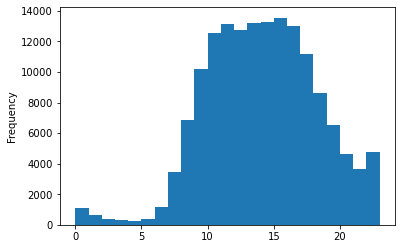

In [186]:
# get hour of day for new customers
new_customer_times = df_new['order_hour_of_day'].plot.hist(bins = 23)

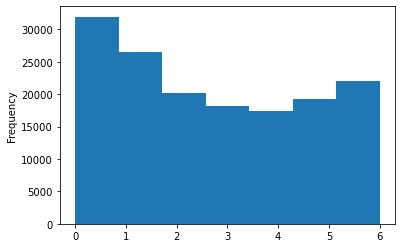

In [188]:
# get order day of week for regular customers
new_customer_days = df_new['order_day_of_week'].plot.hist(bins = 7)

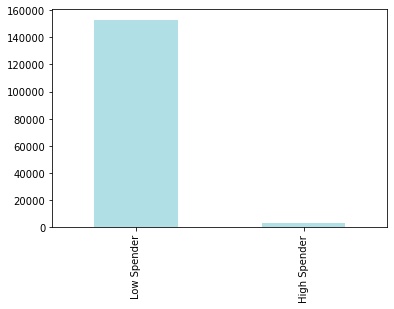

In [189]:
# new customer spender
new_spender_bar = df_new['spender'].value_counts().plot.bar(color = ['powderblue'])

# C. Are there differences in ordering habits based on a customer’s region?

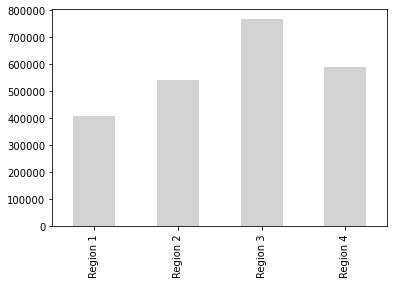

In [123]:
bar_region = df4['region'].value_counts().sort_index().plot.bar(color = ['lightgray'])

In [124]:
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region.png'))

In [192]:
# create crosstab for regions and spenders
crosstab_region_spender = pd.crosstab(df4['region'], df4['spender'], dropna = False)

In [193]:
# look at crosstab
crosstab_region_spender.head()

spender,High Spender,Low Spender
region,,
Region 1,7651,401890
Region 2,11444,528901
Region 3,14765,753237
Region 4,11212,579048


In [196]:
# look at crosstab for regions and loyalty
crosstab_region_loyalty = pd.crosstab(df4['region'], df4['loyalty_flag'], dropna = False)

In [197]:
# look at crosstab
crosstab_region_loyalty.head()

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Region 1,167128,27464,214949
Region 2,215318,36183,288844
Region 3,307873,51865,408264
Region 4,241695,40059,308506


Region 3 has the most total customers, both in high spenders, low spenders, and loyal customers. It's followed by region 4 and then region 1. They have similar ratios of high to low spenrs, all fallling around 2 percent. In terms of the split of regular to loyal to new, they are also similar. About 50-54 percent are regular, 6 percent are new, and 40 percent are loyal. 

In [198]:
# copy crosstab
crosstab_region_loyalty.to_clipboard()

# D. Is there a connection between age and family status in terms of ordering habits?

One thing I've come across with this exercise is ordering habits is very broad. There are many factors I could examine (departments, number of orders, spending, loyalty, time of day, day of week etc.) Since I am looking at over 20 combinations of age/family status, I decided to go with some very broad categories to see if there were major differences.

In [222]:
# create crosstab for age range and loyalty
crosstab_age_range_loyalty = pd.crosstab(df4['age_range'], df4['loyalty_flag'], dropna = False)

In [224]:
# look at crosstab
crosstab_age_range_loyalty.head(7)

loyalty_flag,Loyal customer,New customer,Regular customer
age_range,,,
18-30,186018,32245,250629
31-40,146898,23346,191765
41-50,146955,24281,190451
51-60,146029,24365,190138
61-70,145616,24192,187258
71-81,160498,27142,210322


In [235]:
# copy crosstab
crosstab_age_range_loyalty.to_clipboard()

In [228]:
# create crosstab for family status and loyalty
crosstab_fam_status_loyalty = pd.crosstab(df4['fam_status'], df4['loyalty_flag'], dropna = False)

In [229]:
# look at crosstab
crosstab_fam_status_loyalty.head(7)

loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,80370,13179,105103
living with parents and siblings,44354,7124,59340
married,653230,109309,858225
single,154060,25959,197895


In [230]:
# create crosstab for age and spender
crosstab_age_spender = pd.crosstab(df4['age_range'], df4['spender'], dropna = False)

In [237]:
# copy to clipboard
crosstab_fam_status_loyalty.to_clipboard()

In [231]:
# look at crosstab
crosstab_age_spender.head(7)

spender,High Spender,Low Spender
age_range,,
18-30,8438,460454
31-40,6863,355146
41-50,8099,353588
51-60,6826,353706
61-70,7410,349656
71-81,7436,390526


In [238]:
# copy to clipboard
crosstab_age_spender.to_clipboard()

In [233]:
# create crosstab for family status and spending
crosstab_fam_spender = pd.crosstab(df4['fam_status'], df4['spender'], dropna = False)

In [234]:
# look at crosstab
crosstab_fam_spender.head(7)

spender,High Spender,Low Spender
fam_status,,
divorced/widowed,3960,194692
living with parents and siblings,2170,108648
married,31710,1589054
single,7232,370682


In [239]:
# copy to clipboard
crosstab_fam_spender.to_clipboard()

I did an analysis of loyalty status and spending habbits. In all of the categories of age range and family status, we got very similar answer and percentage rates.

# E. What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

The different demographic information suggests classifications based on age, income, family status etc. We can look at what age ranges, types of family units, and income brackets do in turms of their purchasing behavior. We can also learn about them from what they purchase (ie whether they have pets, young kids, how health conscious they are etc.)

# F. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [400]:
# look at profiles, delete not enough data profiles
df5 = df4[df4.age_fam_dep != 'Not enough data']

In [401]:
# create crosstab for profiles and spenders
crosstab_profile_spender = pd.crosstab(df5['age_fam_dep'], df5['spender'], dropna = False)

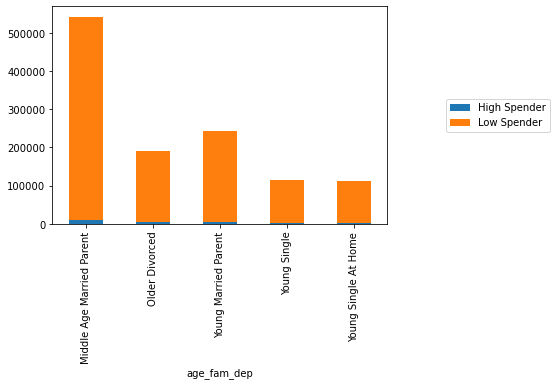

In [402]:
# Create a stacked bar of profile/spend
stacked_profile_spender = crosstab_profile_spender.plot(kind = 'bar', stacked = True)
plp.legend(loc='right', bbox_to_anchor=(1.5, 0.50))

In [403]:
# create crosstabe for profile loyalty
crosstab_profile_loyalty = pd.crosstab(df5['age_fam_dep'], df5['loyalty_flag'], dropna = False)

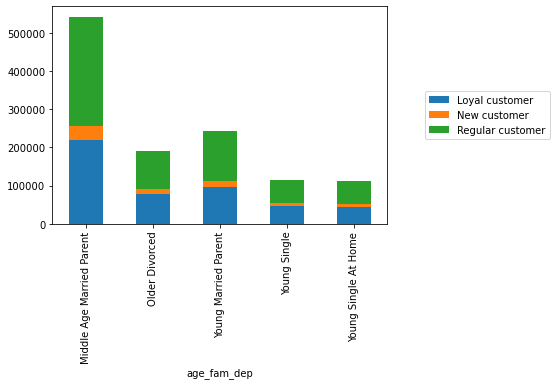

In [404]:
# Create a stacked bar of profile/spend
stacked_profile_loyalty = crosstab_profile_loyalty.plot(kind = 'bar', stacked = True)
plp.legend(loc='right', bbox_to_anchor=(1.5, 0.50))

In [405]:
# create crosstab for profiles and departments
crosstab_profile_departments = pd.crosstab(df5['age_fam_dep'], df5['department'], dropna = False)

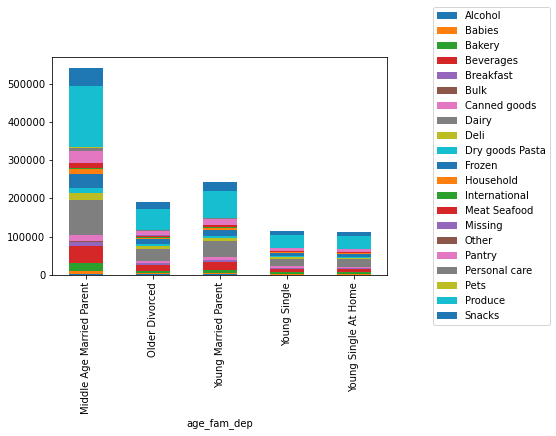

In [406]:
# Create a stacked bar of profile/spend
stacked_profile_departments = crosstab_profile_departments.plot(kind = 'bar', stacked = True)
plp.legend(loc='right', bbox_to_anchor=(1.5, 0.50))

In [432]:
# create column for sum of orders
crosstab_profile_max_order = pd.crosstab(df5['age_fam_dep'], df5['max_order'], dropna = False)

In [411]:
# create column for sum of orders
df5['order_sum'] = df5.groupby('order_id').agg({'prices': ['sum']})

C:\Users\eserc\AppData\Local\Temp\ipykernel_8532\4041585852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['order_sum'] = df5.groupby('order_id').agg({'prices': ['sum']})


In [431]:
# calculate the sum of orders
df5['order_sum'].describe()

count    223.000000
mean      36.312500
std       33.531250
min        1.299805
25%       11.703125
50%       25.093750
75%       52.125000
max      184.000000
Name: order_sum, dtype: float64

In [413]:
# create gropu for average order cost and profile
df5.groupby('age_fam_dep').agg({'order_sum': ['mean']})

,order_sum
,mean
age_fam_dep,
Middle Age Married Parent,48.562500
Older Divorced,41.781250
Young Married Parent,30.031250
Young Single,30.281250
Young Single At Home,30.078125


In [415]:
# create group for average space between orders and profiles
df5.groupby('age_fam_dep').agg({'days_since_prior_order': ['mean']})

,days_since_prior_order
,mean
age_fam_dep,
Middle Age Married Parent,10.125000
Older Divorced,10.015625
Young Married Parent,10.125000
Young Single,10.273438
Young Single At Home,10.085938


In [416]:
# create group for avg max order among 
df5.groupby('age_fam_dep').agg({'max_order': ['mean']})

,max_order
,mean
age_fam_dep,
Middle Age Married Parent,39.12500
Older Divorced,39.84375
Young Married Parent,39.00000
Young Single,38.75000
Young Single At Home,39.81250


# Export Data

In [ ]:
#export to pickle

df4.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_large_10.pkl'))